# Text Mining with R

## Acknowledgements
We would like to acknowledge the work of Julia Silge and David Robinson, whose materials were used under the terms of the Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States License. Their contributions to open data science education, particularly the [Text Mining with R](https://www.tidytextmining.com), provided valuable resources for this project.

This code sets the locale and encoding options in R to handle text properly, especially for special characters. 

In [19]:
Sys.setlocale("LC_ALL", "en_US.UTF-8")
options(encoding = "UTF-8")


[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

## Packages to Install

In [2]:
install.packages("dplyr")
install.packages("tidytext")
install.packages("ggplot2")
install.packages("gutenbergr")
install.packages("tidyr")



The downloaded binary packages are in
	/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T//RtmpNkD8eK/downloaded_packages

The downloaded binary packages are in
	/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T//RtmpNkD8eK/downloaded_packages

The downloaded binary packages are in
	/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T//RtmpNkD8eK/downloaded_packages

The downloaded binary packages are in
	/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T//RtmpNkD8eK/downloaded_packages

The downloaded binary packages are in
	/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T//RtmpNkD8eK/downloaded_packages


## Tidy Text Format
Using tidy data principles simplifies and improves data handling, including text analysis. Tidy text data is organized so that each token—usually a word—is stored in its own row, making it easy to manipulate with standard tidyverse tools like dplyr, tidyr, and ggplot2. The tidytext package supports converting text into this one-token-per-row format and allows seamless integration with other text mining packages. While tidy data is ideal for many steps, tidytext also supports converting between tidy formats and traditional text structures like document-term matrices to accommodate various workflows. This flexibility helps users efficiently analyze, model, and visualize text data using familiar tidy tools.

## Comparing Tidy Text vs. Other Data Structures
Tidy text format organizes text data into a table with one token per row, following tidy data principles and enabling consistent manipulation with tidy tools. This differs from common text mining storage methods such as raw strings, corpora (collections of annotated text), and document-term matrices, which represent documents as rows and terms as columns. While text often starts as strings or corpora in R, the tidy approach focuses on restructuring this data for easier analysis. More complex structures like corpora and document-term matrices will be discussed later, but for now, the focus is on converting text into the tidy format.

## Using `unnest_tokens`

This code creates a character vector called `text` that stores four lines from a poem as individual string elements. The `c()` function, short for "concatenate" or "combine," is used to group the four separate text lines into a single vector, with each line occupying its own position in the sequence. After creating the vector, typing `print(text)` prints the contents to the console, showing each line of the poem as a numbered element in the output. This approach is often used to store small text datasets, like poems, song lyrics, or quotes, which can later be analyzed or manipulated in R for tasks such as text mining or string operations.


In [3]:
text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")

print(text)

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortality"                       


This code begins by loading the **dplyr** package using `library(dplyr)`, which provides powerful tools for data manipulation, especially with data frames and tibbles. The `suppressPackageStartupMessages()` function is wrapped around the library call to prevent unnecessary messages from cluttering the console, keeping the output clean and focused. Next, the code creates a tibble called `text_df` using the `tibble()` function, which provides a more readable and user-friendly alternative to traditional data frames. The tibble contains two columns: `line`, which numbers each row from 1 to 4, and `text`, which holds each line from the poem stored in the `text` vector. Finally, typing `text_df` displays the contents of the tibble in a well-organized table, making the data easy to inspect and ready for further analysis.

In [18]:
suppressPackageStartupMessages(library(dplyr))
text_df <- tibble(line = 1:4, text = text)

print(text_df)

# A tibble: 4 x 2
   line text                                  
  <int> <chr>                                 
1     1 Because I could not stop for Death -  
2     2 He kindly stopped for me -            
3     3 The Carriage held but just Ourselves -
4     4 and Immortality                       


Within our tidy text framework, we need to break the text into individual tokens—a process called tokenization—and transform it into a tidy data structure. To do this, we use the `unnest_tokens()` function from the tidytext package. This function takes two main arguments: the name of the output column for the tokens (here, `word`) and the input column containing the text (here, `text`). After tokenization, each row contains one lowercase word with punctuation removed, while other columns like the line number are retained. If you do not want it to make the words lowercase you can use the, `to_lower = FALSE` argument. This tidy format makes it easy to manipulate, analyze, and visualize the text using tidyverse tools such as dplyr, tidyr, and ggplot2.

In [5]:
library(tidytext)

text_df %>%
  unnest_tokens(word, text) %>%
  print()


# A tibble: 20 x 2
    line word       
   <int> <chr>      
 1     1 because    
 2     1 i          
 3     1 could      
 4     1 not        
 5     1 stop       
 6     1 for        
 7     1 death      
 8     2 he         
 9     2 kindly     
10     2 stopped    
11     2 for        
12     2 me         
13     3 the        
14     3 carriage   
15     3 held       
16     3 but        
17     3 just       
18     3 ourselves  
19     4 and        
20     4 immortality


## Tidying the Works of Jane Austen

We’ll use the full text of Jane Austen’s six completed novels from the **janeaustenr** package, which provides the books in a one-row-per-line format—each line representing a literal printed line from the book. Starting with this format, we’ll convert the text into a tidy structure by adding two new columns using `mutate()`: one to number each line (`linenumber`) and another to identify chapters using a regular expression. This approach helps preserve the original text structure while preparing the data for tidy text analysis.


In [6]:
library(janeaustenr)
library(dplyr)
library(stringr)

original_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, 
                                     regex("^chapter [\\divxlc]",
                                           ignore_case = TRUE)))) %>%
  ungroup()

print(original_books)

# A tibble: 73,422 x 4
   text                    book                linenumber chapter
   <chr>                   <fct>                    <int>   <int>
 1 "SENSE AND SENSIBILITY" Sense & Sensibility          1       0
 2 ""                      Sense & Sensibility          2       0
 3 "by Jane Austen"        Sense & Sensibility          3       0
 4 ""                      Sense & Sensibility          4       0
 5 "(1811)"                Sense & Sensibility          5       0
 6 ""                      Sense & Sensibility          6       0
 7 ""                      Sense & Sensibility          7       0
 8 ""                      Sense & Sensibility          8       0
 9 ""                      Sense & Sensibility          9       0
10 "CHAPTER 1"             Sense & Sensibility         10       1
# i 73,412 more rows


To create a tidy dataset for analysis, we need to restructure the text so that each token—typically a single word—occupies its own row. This transformation is accomplished using the `unnest_tokens()` function, which relies on the **tokenizers** package. It breaks the text into individual tokens and arranges them in the one-token-per-row format essential for tidy text analysis. By default, it tokenizes by words, but it also supports other units such as characters, n-grams, sentences, lines, paragraphs, or tokens defined by a custom regex pattern. This flexibility allows us to tailor tokenization to the specific needs of the analysis.

In [7]:
library(tidytext)
tidy_books <- original_books %>%
  unnest_tokens(word, text)

print(tidy_books)

# A tibble: 725,064 x 4
   book                linenumber chapter word       
   <fct>                    <int>   <int> <chr>      
 1 Sense & Sensibility          1       0 sense      
 2 Sense & Sensibility          1       0 and        
 3 Sense & Sensibility          1       0 sensibility
 4 Sense & Sensibility          3       0 by         
 5 Sense & Sensibility          3       0 jane       
 6 Sense & Sensibility          3       0 austen     
 7 Sense & Sensibility          5       0 1811       
 8 Sense & Sensibility         10       1 chapter    
 9 Sense & Sensibility         10       1 1          
10 Sense & Sensibility         13       1 the        
# i 725,054 more rows


Now that the text is organized with one word per row, we can use tidy tools like **dplyr** to manipulate it effectively. A common step in text analysis is removing stop words—very common words like “the,” “of,” and “to” that usually don’t add meaningful information. The **tidytext** package provides a built-in `stop_words` dataset containing stop words from three different lexicons, which we can remove from our data using `anti_join()`. Depending on the analysis, we can choose to use all these stop words together or filter to use just one lexicon’s set if that fits better. This cleaning step helps focus analysis on the most relevant words.

In [8]:
data(stop_words)

tidy_books <- tidy_books %>%
  anti_join(stop_words)

Joining with `by = join_by(word)`


Using dplyr’s `count()` function, we can quickly tally how often each word appears across all the books combined. This lets us identify the most common words in the entire collection, which is a helpful step to understand word frequency patterns before or after removing stop words.

In [9]:
tidy_books %>%
  count(word, sort = TRUE) %>%
  print()


# A tibble: 13,910 x 2
   word       n
   <chr>  <int>
 1 miss    1855
 2 time    1337
 3 fanny    862
 4 dear     822
 5 lady     817
 6 sir      806
 7 day      797
 8 emma     787
 9 sister   727
10 house    699
# i 13,900 more rows


Since our word counts are stored in a tidy data frame thanks to using tidy tools, we can easily pipe this data directly into **ggplot2** to create visualizations. For example, we can quickly plot the most common words to explore their frequencies, making it straightforward to gain insights through clear, customizable graphs.

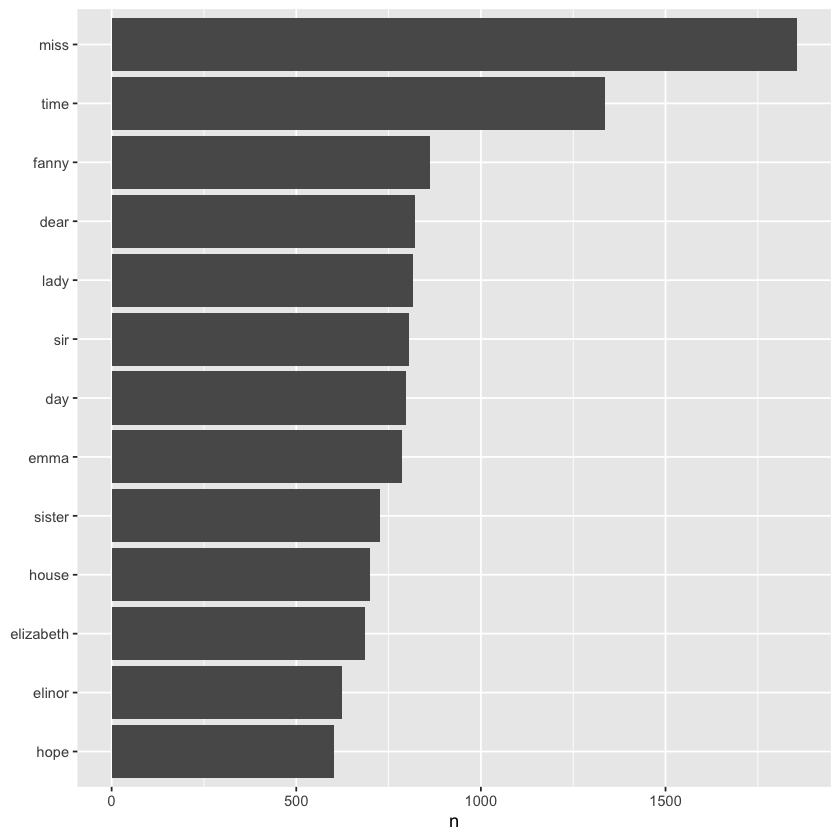

In [10]:
library(ggplot2)

tidy_books %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word)) +
  geom_col() +
  labs(y = NULL)

## The Gutenbergr Package

Now that we’ve explored tidying text with the **janeaustenr** package, we turn to the [gutenbergr](https://github.com/ropensci/gutenbergr) package, which provides access to public domain books from [Project Gutenberg](https://www.gutenberg.org). This package offers tools for downloading books while automatically removing unnecessary header and footer text. It also includes a comprehensive dataset of metadata, allowing users to search for works by title, author, language, and more. In this book, we’ll primarily use the `gutenberg_download()` function to fetch texts by their Gutenberg ID, but the package also supports exploring metadata and gathering author information.  

To learn more about gutenbergr, check out the [package’s documentation at rOpenSci](https://docs.ropensci.org/gutenbergr/), where it is one of rOpenSci’s packages for data access.

## Word Frequencies

A common task in text mining is examining word frequencies and comparing them across different texts, which can be done easily using tidy data principles. We’ve already done this with Jane Austen’s novels, and now we’ll expand the analysis by adding more texts for comparison. Specifically, we’ll look at science fiction and fantasy novels by H.G. Wells, a prominent author from the late 19th and early 20th centuries. Using the `gutenberg_download()` function along with the Project Gutenberg ID numbers, we can access works like [The Time Machine](https://www.gutenberg.org/ebooks/35), [The War of the Worlds](https://www.gutenberg.org/ebooks/36), [The Invisible Man](https://www.gutenberg.org/ebooks/5230), and [The Island of Doctor Moreau](https://www.gutenberg.org/ebooks/159). This allows us to efficiently gather and prepare these texts for direct comparison with other literary works.

In [11]:
library(gutenbergr)

hgwells <- gutenberg_download(c(35, 36, 5230, 159))

Determining mirror for Project Gutenberg from
https://www.gutenberg.org/robot/harvest.
Using mirror http://aleph.gutenberg.org.


In [12]:
tidy_hgwells <- hgwells %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining with `by = join_by(word)`


Here we can use `count()` to get the most common words in these novels of H.G. Wells. 

In [13]:
tidy_hgwells %>%
  count(word, sort = TRUE) %>%
  print()

# A tibble: 11,810 x 2
   word       n
   <chr>  <int>
 1 time     461
 2 people   302
 3 door     260
 4 heard    249
 5 black    232
 6 stood    229
 7 white    224
 8 hand     218
 9 kemp     213
10 eyes     210
# i 11,800 more rows


Next, we’ll gather several well-known works by the Brontë sisters, whose lifespans overlapped somewhat with Jane Austen's, though their writing style was notably different. We’ll include [Jane Eyre](https://www.gutenberg.org/ebooks/1260), [Wuthering Heights](https://www.gutenberg.org/ebooks/768), [The Tenant of Wildfell Hall](https://www.gutenberg.org/ebooks/969), [Villette](https://www.gutenberg.org/ebooks/9182), and [Agnes Grey](https://www.gutenberg.org/ebooks/767). Just like with the H.G. Wells novels, we’ll use the Project Gutenberg ID numbers for each of these books and download the texts with `gutenberg_download()`. This will allow us to compare word usage and literary style across different authors and genres within a tidy data framework.


In [14]:
bronte <- gutenberg_download(c(1260, 768, 969, 9182, 767))

In [15]:
tidy_bronte <- bronte %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining with `by = join_by(word)`


Here we can use `count()` to get the most common words in these novels of the Brontë Sisters. 

In [16]:
tidy_bronte %>%
  count(word, sort = TRUE) %>%
  print()

# A tibble: 23,204 x 2
   word             n
   <chr>        <int>
 1 "time"        1065
 2 "miss"         854
 3 "day"          825
 4 "don\u2019t"   780
 5 "hand"         767
 6 "eyes"         714
 7 "night"        648
 8 "heart"        638
 9 "looked"       601
10 "door"         591
# i 23,194 more rows


Notice that “time”, “eyes”, and “hand” are in the top 10 for both H.G. Wells and the Brontë sisters.

To compare word frequencies across the works of Jane Austen, the Brontë sisters, and H.G. Wells, we can bind their data frames together and calculate word counts for each group. Using `pivot_wider()` and `pivot_longer()` from **tidyr**, we can reshape the combined dataset to make it suitable for visualizing and comparing word usage across the three sets of novels. Additionally, we apply `str_extract()` to clean up the text, since some Project Gutenberg texts use underscores to mark emphasis (similar to italics). Without this step, words like “_any_” and “any” would be counted separately, but `str_extract()` ensures we treat them as the same word, keeping our frequency analysis accurate and consistent.


In [20]:
library(tidyr)

frequency <- bind_rows(mutate(tidy_bronte, author = "Brontë Sisters"),
                       mutate(tidy_hgwells, author = "H.G. Wells"), 
                       mutate(tidy_books, author = "Jane Austen")) %>% 
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(author, word) %>%
  group_by(author) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  pivot_wider(names_from = author, values_from = proportion) %>%
  pivot_longer(`Brontë Sisters`:`H.G. Wells`,
               names_to = "author", values_to = "proportion")

print(frequency)
#> # A tibble: 57,812 × 4
#>    word    `Jane Austen` author          proportion
#>    <chr>           <dbl> <chr>                <dbl>
#>  1 a          0.00000919 Brontë Sisters  0.00000797
#>  2 a          0.00000919 H.G. Wells     NA         
#>  3 a'most    NA          Brontë Sisters  0.0000159 
#>  4 a'most    NA          H.G. Wells     NA         
#>  5 aback     NA          Brontë Sisters  0.00000398
#>  6 aback     NA          H.G. Wells      0.0000150 
#>  7 abaht     NA          Brontë Sisters  0.00000398
#>  8 abaht     NA          H.G. Wells     NA         
#>  9 abandon   NA          Brontë Sisters  0.0000319 
#> 10 abandon   NA          H.G. Wells      0.0000150 
#> # ℹ 57,802 more rows

# A tibble: 56,530 × 4
   word      `Jane Austen` author          proportion
   <chr>             <dbl> <chr>                <dbl>
 1 a            0.00000919 Brontë Sisters  0.0000430 
 2 a            0.00000919 H.G. Wells     NA         
 3 aback       NA          Brontë Sisters  0.00000391
 4 aback       NA          H.G. Wells      0.0000147 
 5 abaht       NA          Brontë Sisters  0.00000391
 6 abaht       NA          H.G. Wells     NA         
 7 abandon     NA          Brontë Sisters  0.0000313 
 8 abandon     NA          H.G. Wells      0.0000147 
 9 abandoned    0.00000460 Brontë Sisters  0.0000899 
10 abandoned    0.00000460 H.G. Wells      0.000177  
# ℹ 56,520 more rows


We can visualize the word frequency comparisons across the works of Jane Austen, the Brontë sisters, and H.G. Wells using a scatter plot. In these plots, words that fall close to the diagonal line occur with similar frequency in both sets of texts, while words that deviate from the line appear more often in one author’s works than the other’s. For example, proper nouns like “elizabeth,” “emma,” and “fanny” appear frequently in Austen’s novels but not in the Brontë texts, while words like “arthur” and “dog” are found more often in the Brontë works. In comparing Austen and H.G. Wells, Wells tends to use words like “beast,” “guns,” and “black,” while Austen’s texts include more words like “family,” “friend,” and “dear.” Overall, the Austen-Brontë comparison shows more similarity, with words clustered near the line and extending to lower frequencies, whereas the Austen-Wells comparison reveals greater differences, reflected in fewer shared words and a noticeable gap at lower frequencies.


Warning message:
“Removed 40248 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 40250 rows containing missing values or values outside the scale range
(`geom_text()`).”


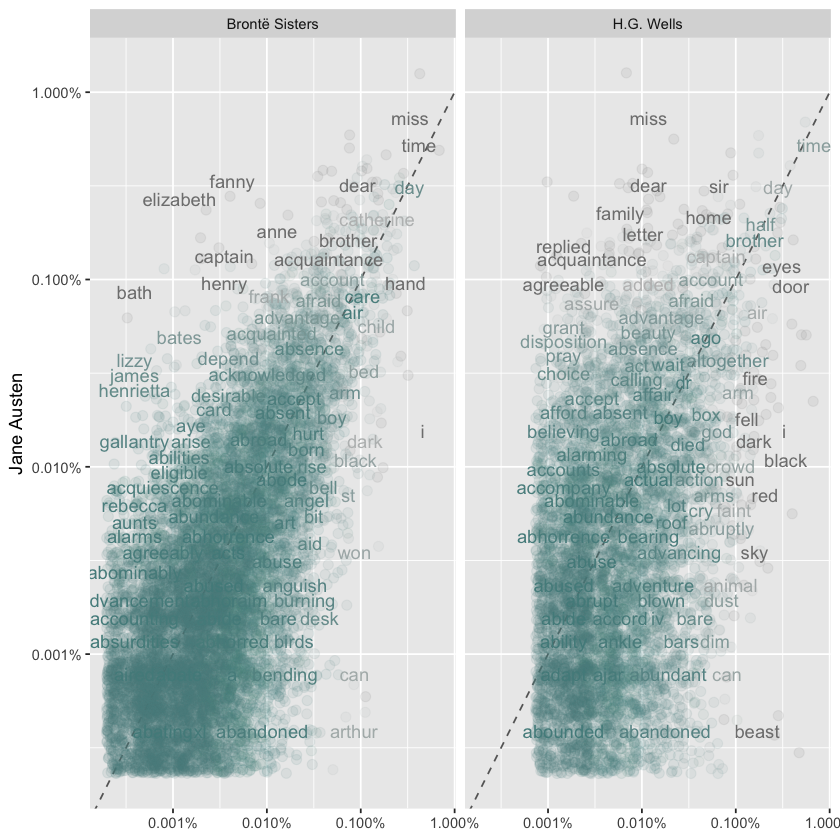

In [21]:
library(scales)

# expect a warning about rows with missing values being removed
ggplot(frequency, aes(x = proportion, y = `Jane Austen`, 
                      color = abs(`Jane Austen` - proportion))) +
  geom_abline(color = "gray40", lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.001), 
                       low = "darkslategray4", high = "gray75") +
  facet_wrap(~author, ncol = 2) +
  theme(legend.position="none") +
  labs(y = "Jane Austen", x = NULL)

We can measure the similarity of these word frequencies using a correlation test, which quantifies how closely related the word usage patterns are between different authors. Specifically, we calculate the correlation between Austen’s novels and the Brontë sisters, and separately between Austen and H.G. Wells. Typically, the correlation between Austen and the Brontë sisters falls in a higher range (around 0.7 to 0.9), indicating strong similarity in word usage. In contrast, the correlation between Austen and Wells is lower (often around 0.4 to 0.6), reflecting more distinct language and style differences. These numerical results confirm what we observed in the plots: Austen’s works are linguistically closer to the Brontë sisters than to H.G. Wells.

In [22]:
cor.test(data = frequency[frequency$author == "Brontë Sisters",],
         ~ proportion + `Jane Austen`)

cor.test(data = frequency[frequency$author == "H.G. Wells",], 
         ~ proportion + `Jane Austen`)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 110.74, df = 10273, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7287443 0.7463754
sample estimates:
      cor 
0.7376856 



	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 35.238, df = 6005, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3927627 0.4346793
sample estimates:
      cor 
0.4139404 
